In [1]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Counter(dict):
    def __missing__(self, key):
        return 0

In [3]:
with open('data_18_19.pickle', 'rb') as f:
    data = pickle.load(f)

cntr = Counter()
for chunk in data:
    for key, value in chunk.items():
        cntr[key] += value

In [4]:
df = pd.DataFrame.from_dict(cntr, orient='index')
df.reset_index(inplace=True)
POWER = 'power in bins of 0.1W'
COUNT = 'count'
PERCENT = 'count [%]'
df.columns = [POWER, COUNT]

In [5]:
# remove outliers
count_trsh = df[df[POWER] > 500].sort_values(COUNT, ascending=False)[COUNT].to_list()[0]
df = df[df[COUNT] > count_trsh]

In [6]:
total_count = sum(df[COUNT].to_list())

In [7]:
below = sum(df[df[POWER] < 100][COUNT].to_list()) / total_count
above = sum(df[df[POWER] >= 100][COUNT].to_list()) / total_count
print(f"{below*100}% below, {above*100}% above")

22.62289423168501% below, 77.37710576831499% above


In [8]:
df[PERCENT] = df[COUNT] / total_count * 100

In [9]:
x_max = df.sort_values(POWER, ascending=False)[POWER].to_list()[0]
x_max

359.9

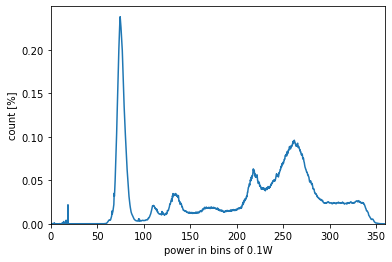

In [10]:
p = sns.lineplot(x=POWER, y=PERCENT, data=df)
p.set_ylim(0)
p.set_xlim(0, x_max)
plt.savefig('../../paper/fig/island6_node_power.pdf', bbox_inches='tight')

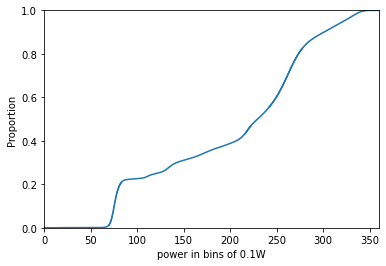

In [11]:
p = sns.ecdfplot(x=POWER, weights=COUNT, stat='proportion', data=df)
p.set_xlim(0, x_max)
plt.savefig('../../paper/fig/island6_node_power_ecdf.pdf', bbox_inches='tight')

In [12]:
df[df[COUNT]>5e5].sort_values(POWER, ascending=False)

,power in bins of 0.1W,count,count [%]
14,79.9,511112,0.114846
21,79.8,519950,0.116832
5,79.7,530351,0.119169
13,79.6,540577,0.121467
3,79.5,549674,0.123511
...,...,...,...
2650,71.6,572744,0.128695
2738,71.5,555695,0.124864
2736,71.4,538754,0.121057
2740,71.3,521141,0.117100


In [13]:
df.sort_values(POWER, ascending=False)

,power in bins of 0.1W,count,count [%]
3079,359.9,59,0.000013
3081,359.8,61,0.000014
3090,359.0,62,0.000014
3067,358.9,99,0.000022
3068,358.8,94,0.000021
...,...,...,...
5826,4.2,351,0.000079
5824,4.1,4959,0.001114
3521,4.0,2347,0.000527
5823,3.9,1415,0.000318


In [14]:
maximum = df.sort_values(POWER, ascending=False)[POWER].to_list()[0]

for idx, chunk in enumerate(data):
    nodename = f"taurusi{6001+idx}"
    if len(chunk) == 0:
        print(f"no data for node {nodename}")
        continue
    chunk_df = pd.DataFrame.from_dict(chunk, orient='index')
    chunk_df.reset_index(inplace=True)
    chunk_df.columns = [POWER, COUNT]
    # check if above maximum
    if chunk_df.sort_values(POWER, ascending=False)[POWER].to_list()[0] > maximum:
        print(f"node {nodename} has outliers")

node taurusi6034 has outliers
node taurusi6075 has outliers
node taurusi6077 has outliers
node taurusi6079 has outliers
node taurusi6081 has outliers
node taurusi6087 has outliers
node taurusi6088 has outliers
node taurusi6090 has outliers
node taurusi6093 has outliers
node taurusi6095 has outliers
node taurusi6096 has outliers
node taurusi6104 has outliers
node taurusi6107 has outliers
node taurusi6111 has outliers
node taurusi6114 has outliers
node taurusi6116 has outliers
node taurusi6121 has outliers
node taurusi6127 has outliers
node taurusi6136 has outliers
node taurusi6137 has outliers
node taurusi6152 has outliers
node taurusi6164 has outliers
node taurusi6165 has outliers
node taurusi6167 has outliers
node taurusi6170 has outliers
node taurusi6200 has outliers
node taurusi6201 has outliers
node taurusi6202 has outliers
node taurusi6204 has outliers
node taurusi6205 has outliers
node taurusi6208 has outliers
node taurusi6211 has outliers
node taurusi6213 has outliers
node tauru